# dev tip filtering 2
Tim Tyree<br>
12.28 .2020

In [395]:
from lib.my_initialization import *

# from lib.my_initialization import *
from lib.utils.utils_traj import *
from lib.routines.bdrates import *
from lib.viewer import *
import trackpy
%autocall 1
%load_ext autoreload
%autoreload 2

Automatic calling is: Smart
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [396]:
#make plots in darkmode
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

# the tip filtering routine that discriminates on the basis of tip number versus time

In [5]:
# input_file_name = search_for_file()
# input_file_name = '/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_8_fastkernel_V_0.5_archive/trajectories/ic_200x200.001.22_traj_sr_400_mem_2.csv'
input_file_name = '/Users/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_8_V_0.5_fastkernel/ic_200x200.001.13_traj_sr_400_mem_0.csv'

In [410]:
#filter trajectories on the basis of total number of tips
LT=5#3#1
# LT=2 #min traj length filter for filter_spikes_of_tip_number
jump_thresh = 20.
mode='backward'

#setting LT_thresh to 0 was necessary to have even tip number after chunking routine 
LT_thresh=0#min traj length filter for decompose_trajectories    
tmin=100
width=200
height=200
DS=5./200.
maxN=9999

saving=True
#used by inneffective retracking method
# lifetime_thresh = 100
# angle_threshold = np.pi/2

#load the original crocker-greer trajectories
# input_file_name = '/Users/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_8_V_0.5_fastkernel/ic_200x200.001.13_log.csv'
df = pd.read_csv(input_file_name)
df.drop_duplicates(inplace=True, ignore_index=True)
df = df[df.t>tmin].copy()
df.reset_index(inplace=True, drop=True)

# compute #retracked trajectories
distance_L2_pbc = get_distance_L2_pbc(width=width,height=height)

df = decompose_trajectories(df, distance_L2_pbc=distance_L2_pbc,DS=DS,
    width=width,height=width,LT_thresh=LT_thresh,tmin=tmin, jump_thresh=jump_thresh)
df_chunked = df.copy()
print(f"the percent of remaining rows not assigned a chunk index = {100*sum(df.cid<0)/df.t.count():.5f}%")
print(f"the percent of rows that comprise an isolated trajectory = {100*sum(df.groupby('particle').t.count()==1)/df.t.count():.5f}%")
#dropped isolated trajectories
#retrack trajectories
# df,pid2counter=retrack_trajectories(df_chunked,distance_L2_pbc,lifetime_thresh=lifetime_thresh,angle_threshold = angle_threshold,LT_thresh=LT_thresh,DS = 5./200.,width=200,height=200, jump_thresh=jump_thresh)
# savefn2=input_file_name.replace('.csv',f'_retracked_at_{angle_threshold:.3f}_jt_{jump_thresh}_lt_{lifetime_thresh}_LT_{LT_thresh}.csv')
# print(f"saved retracked trajectories to {savefn2}.")

#filter trajectories
# N_series,dn_series,events = 
df=filter_spikes_of_tip_number(df,distance_L2_pbc,LT=LT,maxN=maxN,mode=mode, drop=False)
print(f"the percent of rows marked to keep    = {100*sum(df.keep==True)/df.t.count():.5f}%")
print(f"the percent of rows marked as some kind of spike = {100*sum(df.event_code>0)/df.t.count():.5f}%")
#drop the rows marked to not keep
df_filtered=df.copy()
df=df[df.keep==True].copy()

#save the retracked trajectories
if saving:
    savefn2=input_file_name.replace('.csv',f'_filtered_LT_{LT}_tmin_{tmin}.csv')
    df.to_csv(savefn2, index=False)
    print(f"saved filtered trajectories to {savefn2}.")
beep(3)

the percent of remaining rows not assigned a chunk index = 0.00000%
the percent of rows that comprise an isolated trajectory = 0.03242%


AssertionError: 

In [408]:
# # print(ev)
# print(N_series.iloc[ev.flatten()])
# # print(dn_series.iloc[ev.flatten()])
# ev = np.array(events).T
# where_ddn_is_zero=dn_series.iloc[ev.flatten()].diff()==0. # where the equal death of equal size.
# where_birth_is=dn_series.iloc[ev.flatten()]>0. 
# boo=(where_birth_is)&(where_ddn_is_zero)
#TODO: for each of the following frames, compute the number of frames until the equal death of equal size.
# boo[boo]
# where_ddn_is_zero
# dn_series.iloc[ev.flatten()]
# events=pd.Series(index=spike_frm_values_actionable,data=True)#spike_frm_values_actionable)

# print((t_birth_parent,t_birth,nearest_dist_parent,t_death_parent))
# (array([3112.]), array([3110.]), 10.322256886790768, array([3113.]))

In [ ]:
print(dn_series.iloc[ev.flatten()])

In [136]:
boo

frame
121      False
122      False
170       True
180      False
194      False
         ...  
28326    False
28405    False
28535    False
28544    False
28558    False
Name: t, Length: 1171, dtype: bool

# TODO: functionally extract the detect_spikes function and show that it's output has detected visually known spikes.
- ^this determines why the percent of rows marked as some kind of spike is 0%... 
- It should be positive if filtering does anything.
- Spike detection must be to blame. 


In [137]:
df_filtered.event_code.describe()

count    240596.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: event_code, dtype: float64

# TODO: use df_filtered to iron out the tip number versus time
- DONE: make df_chunked have only even the tip number versus time


In [156]:
df = pd.read_csv(input_file_name)

#retracked trajectories
input_file_name2 = savefn2#'/Users/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_8_V_0.5_fastkernel/ic_200x200.001.13_traj_sr_400_mem_0_retracked_at_0.785_jt_20.0_lt_50_LT_4.csv'#'/Users/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_8_V_0.5_fastkernel/ic_200x200.001.13_traj_sr_400_mem_0_retracked_at_0.785_jt_20.0_lt_50_LT_4.csv'
# df2 = pd.read_csv(input_file_name2)
#filtered trajectories
#chunked trajectories
# df2=df_chunked.copy()
df2=df_filtered.copy()

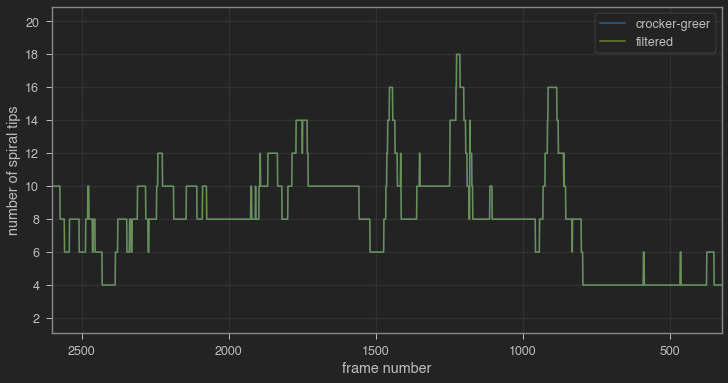

/Users/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_8_V_0.5_fastkernel/ic_200x200.001.13_traj_sr_400_mem_0_filtered_LT_5_tmin_100.csv


In [157]:
s = df.groupby('frame').frame.count()
# s = s.sort_values(ascending=False)
s2 = df2.groupby('frame').frame.count()
beep(1)

plt.subplots(figsize=(12,6))
plt.plot(s, label='crocker-greer',alpha=0.7)
plt.plot(s2, label='filtered',   alpha=0.7)
plt.xlim([2600,325])
# plt.xlim([200,300])
plt.legend()
plt.yticks([2,4,6,8,10,12,14,16,18,20])
plt.ylabel('number of spiral tips')
plt.xlabel('frame number')
plt.grid('on')
plt.show()
print(input_file_name2)

# module for handling all spikes briefer than LT for one file

In [ ]:
#df=df_chunked.copy()
def filter_spikes_of_tip_number(df,distance_L2_pbc,LT=5,maxN=9999,mode='backward',drop=False):
    """filter_spikes_of_tip_number marks high frequency spike events for removal. 
    filter_spikes_of_tip_number marks events before tmin with keep as False and event_code as 0.
    filter_spikes_of_tip_number creates the following fields in df:
    df['particle2'] with the integer indices of output trajectories
    df['keep'] with the boolean of whether or not each row should be considered
    df['event_code'] with events regarding
        - 0 if no event has occurred
        - 1 if a singleton birth has occurred
        - 2 if a virtual birth/death has occured
        - 3 if a transition has occured (when a virtual spiral tip annihilates with a tip that isn't its birth mate)
        - 4 if was part of an apparent stub
    
    Parameters:
    df is a pandas.DataFrame returned by decompose_trajectories
    tmin=100  #earliest time 't' to be considered
    LT = 4    #min number of frames to not be considered a spike
    maxN=9999 #maximum number of tips to consider for filtration
    width=200;height=200

    
    Example Usage:
    df = filter_spikes_of_tip_number(df,distance_L2_pbc,tmin=100,LT=4,maxN=9999,mode='backward',drop=False)
    """
    #initialize field for whether or not to drop the given row
    df['keep']=True
    df['particle2']=df['particle']
    df['event_code']=0

    s         = df.groupby('frame').t.count()
    # s         = s.sort_values(ascending=False)
    # s2        = df2.groupby('frame').t.count()
    N_series  = s[s.index>tmin].copy()
    
    #mark any early rows for removal, too
    #     df.loc[df.t<=tmin,'keep']=False
    

    dn_series = N_series.diff().shift(-1).dropna()#.dropna().values#.
    dn_values = dn_series.values#.dropna().values#.
    events    = list(np.argwhere(dn_values!=0))

    #identify the frames where a spike 
    ev = np.array(events).T
    where_ddn_is_zero=dn_series.iloc[ev.flatten()].diff()==0. # where the equal death of equal size.
    dn_ser=dn_series.iloc[ev.flatten()]
    where_birth_is=dn_ser>0. 
    boo=(where_birth_is)&(where_ddn_is_zero)
    #consider only spikes with sufficient duration
    boob=boo.shift(1).dropna()
    frm_values=boo[boo].index.values
    spike_duration_values = boob[boob].index.values-frm_values
    spike_frm_values_actionable=frm_values[spike_duration_values<LT]
#     dn_nxt_series=dn_ser.shift(1).dropna()[boob]

#     frm_cur= int(spike_frm_values_actionable[0])#d.index.values)
#     frm=frm_cur
#     d  = N_series.iloc[frm]#events[0]]
#     N_cur  = int(d)#.values)
#     dn_cur = int(dn_series.iloc[frm])#events[0]])#.values)

    for frm in spike_frm_values_actionable:
#         d = N_series.iloc[frm]#events[i+1]]#frm+1]#
        frm_cur=frm#-4
#         N_cur  = int(N_series.iloc[frm_cur])
#         N_nxt  = int(N_series.iloc[frm_cur+1])#.values)
#         dn_cur = N_nxt-N_cur#int(dn_series.iloc[frm+1])#events[i+1]])#.values)#frm+1])#.values)#
#         frm_cur = frm#int(d.index.values)
#         assert(dn_cur!=0)
#         assert(dn_nxt!=0)
#         is_simple_spike=(dn_cur>0)&(dn_cur+dn_nxt==0)
#         spike_duration=frm_nxt-frm_cur
#         if (spike_duration<LT)&(is_simple_spike):
        #then, we have a spike lasting from frm_cur to frm_nxt
        #indices of curves born in frame frm
        p_values = df[df['frame']==frm_cur]['cid'].values.T
        p_nxt_values = df[df['frame']==frm_cur+1]['cid'].values.T
        assert(len(list(p_nxt_values))>len(list(p_values)))
        new_tip_lst = sorted(set(p_nxt_values).difference(set(p_values)))

        #mark each new tip for removal or merging 
        num_new_tips=handle_n_tips(df,new_tip_lst,distance_L2_pbc,drop=False,mode='backward')    
        
#         #update the _cur values
#         N_cur=N_nxt
#         dn_cur=dn_nxt
#         frm_cur=frm_nxt
    if drop:
        df=df[df.keep==True].copy()
    return df
#     return ((frm_cur,N_cur,dn_cur),(frm_nxt,N_nxt,dn_nxt))
#     return N_series,dn_series,events

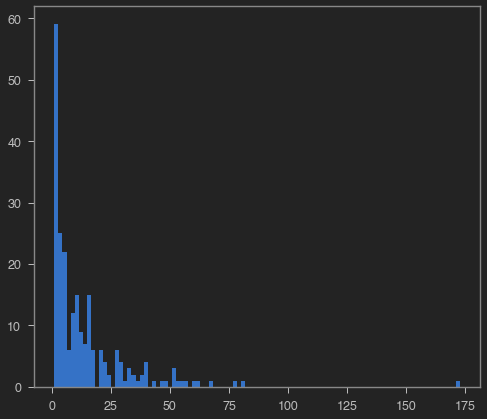

In [196]:
plt.hist(spike_duration_values,bins=100)
plt.show()

# dev module for tip filtering

In [ ]:
def handle_n_tips(df,new_tip_lst,distance_L2_pbc,drop=False,mode='backward'):
    '''Example Usage:
    num_new_tips=handle_n_tips(df,new_tip_lst,distance_L2_pbc,drop=False,mode='backward')    
    '''
    #     new_tip_lst = sorted(set(p_nxt_values).difference(set(p_values)))
    num_new_tips=len(new_tip_lst)
    if num_new_tips==1:
        #then this one tip was born. 
        #mark that cid to be dropped
        df.loc[df.cid==new_tip_lst[0],'keep']=False
        df.loc[df.cid==new_tip_lst[0],'event_code']=1
    elif num_new_tips==2:
        #then two tips were born
        #TODO: run 2 tip routine, which determines if the two tips (a) self collided or (b) performed an exchange.
        #     print(f"CAUTION: not implemented. skipping len(lifetime_lst)={len(lifetime_lst)}...")
        # identify the tips that were born at the given birth, which is known to be quickly followed by a death of equal size
        cid_a=new_tip_lst[0]
        cid_b=new_tip_lst[1]
        dist_death_parent=handle_two_tips(df,cid_a,cid_b,distance_L2_pbc,mode=mode)
    elif num_new_tips>=3:
        #then at leastthree tips were born.  
        # pair any newly born tips when possible
        pair_lst,singleton_lst=partition_cid_list(df,new_tip_lst,distance_L2_pbc)
        # mark each singleton for removal
        for cid in singleton_lst:
            df.loc[df.cid==cid,'keep']=False
            df.loc[df.cid==cid,'event_code']=1
        # for each pair of newly born tips, handle_two_tips
        for cid_a,cid_b in pair_lst:
            dist_death_parent=handle_two_tips(df,cid_a,cid_b,distance_L2_pbc,mode=mode)   
    else:
        print(f"CAUTION: no tips found in new_tip_lst. skipping new_tip_lst={new_tip_lst}...")

    if drop is True:
        #drop all marked cid from the DataFrame
        df=df[df.keep==True].copy()
    return num_new_tips


In [ ]:
def partition_cid_list(df,new_tip_lst,distance_L2_pbc):
    """pair any newly born tips when possible.
    Example Usage:
    pair_lst,singleton_lst=partition_cid_list(df,new_tip_lst,distance_L2_pbc)
    """
    ntl=list(new_tip_lst)
    ntl.append([3])
    pair_lst=[]
    singleton_lst=[]
    for n,cid_a in enumerate(ntl):
        # compute the birthmate of cid_a
        nearest_cid_birth, nearest_dist_birth, t_birth = identify_birth_partner(df,cid_a,distance_L2_pbc)
        pair_found=False
        #if the birth mate is the other new tip
        for m,cid_b in enumerate(ntl[n:]):
            if  (  cid_b==nearest_cid_birth  ):
                #then we found a pair
                pair_lst.append((cid_a,cid_b))
                pair_found=True
            if not pair_found:
                #no pair was found
                singleton_lst.append(cid_a)
    return pair_lst,singleton_lst

In [ ]:
#identify death mate via dissappearance of particle


In [89]:

# identify_birth_partner(df,cid,distance_L2_pbc)


In [65]:
# #TODO: consider the case where d.values>0
# all_birth_values = dn_values[dn_values>0]
# all_birth_values==1
# #where birth of 1 occurs
# N_series.iloc[:-1][dn_values==1]

# #where birth of 2 occurs
# N_series.iloc[:-1][dn_values==2]

# #where birth of 3 occurs
# print("where birth of 3 occurs")
# print(N_series.iloc[:-1][dn_values==3])

# #where birth of 4 occurs
# print("\nwhere birth of 4 occurs")
# print(N_series.iloc[:-1][dn_values==4])



In [71]:
#TODO: compute whether this given tip dies within a threshold amount of time with a dn that is oppositly signed of itself.
#yaxis= time to nexxt tip
#xaxis= number of tips before birth/death

In [64]:
# # What's the duration of fast up/down bd events given that n=2 or 4?
# frm_values = N_series[(N_series==2)].index.values
# n_values = N_series[(N_series==2)].values
# # frm_values = N_series[(N_series==2)|(N_series==4)].index.values
# # n_values = N_series[(N_series==2)|(N_series==4)].values

# #the number of frames between births is
# nfbb=np.argwhere((np.diff(frm_values)-1>0)).T
# print(nfbb)

In [63]:
# # identify the tips that were born
# print(set(p_values))
# print(set(p_nxt_values))
# new_tip_lst = sorted(set(p_nxt_values).difference(set(p_values)))
# print(new_tip_lst)
# # x_values,y_values,p_values = df[df['frame']==frm][['x','y','cid']].values.T
# # x_nxt_values,y_nxt_values,p_nxt_values = df[df['frame']==frm+1][['x','y','cid']].values.T

In [ ]:
# n_values = N_series.values[1:]
# np.argwhere((dn_values>0)&(n_values==4))

# print the particle id's of where a single birth occurs

In [70]:
#where birth of 1 occurs
N_series.iloc[:-1][dn_values==1]

frame
209       6
1350     10
1414      8
1892     10
1908      8
         ..
26430    14
26917     8
26980    10
26988    10
27462    10
Name: t, Length: 61, dtype: int64

In [ ]:
frm_odd_birth = N_series.iloc[:-1].shift(-1)[dn_values==1].index.values
frm = frm_odd_birth[0]
# frm_odd_birth


In [ ]:
#(functionally) print the value of cid in in the current/next frame
cid_current = df[df.frame==frm].cid.values
cid_next = df[df.frame==frm+1].cid.values

In [ ]:
# s = pd.DataFrame({'n':n_values.T,'dn':dn_values.T})#,'frm':frm_values[2:]})

# TODO(later): dev a right/left hand measurer from trajectory
- and then, TODO: test ^this using indentify_birth_partner

In [11]:
#TODO: compute the distance of the two tips as a function of time
#lifetime_lst.append(df[df.cid==cid].cid.count())

# DONE: use set differences to compute birth/death mates

In [271]:
# frm_cur=frm_values[0]
# p_values = df[df['frame']==frm_cur]['cid'].values.T
# p_nxt_values = df[df['frame']==frm_cur+1]['cid'].values.T
# assert(len(list(p_nxt_values))>len(list(p_values)))
# new_tip_lst = sorted(set(p_nxt_values).difference(set(p_values)))
# new_tip_lst

# #TODO(later): compute the lifetime for all cid
# #TODO(later): compute the deathmate for all cid
# #TODO(later): compute the birthmate for all cid

[877, 881]

In [305]:
# def identify_birth_partner(df,cid,distance_L2_pbc):
#     """identify birth mate using set difference.
#     Example Usage:
#     cid_birthmate, nearest_dist_birth, t_birth = identify_birth_partner(df,cid,distance_L2_pbc)
#     """
#     #self
#     d = df[df.cid == cid]
#     x,y,frm,t = d.head(1)[['x','y','frame','t']].values.T
#     frm_birth=frm
#     xy_self = np.array((x,y)).T
#     #others that died in the same frame
#     cid_others = df[(df.frame==int(frm))&(df.cid!=cid)]['cid'].values.T  
#     cid_others_prv = df[(df.frame==int(frm)-1)&(df.cid!=cid)]['cid'].values.T  
#     cid_born_lst=sorted(set(list(cid_others)).difference(set(list(cid_others_prv))))
#     assert(len(cid_born_lst)>0)

#     cid_others=np.array(cid_born_lst)
#     boo = (df.frame!=df.frame)#tautologically False
#     for cid_other in cid_others:
#         boo |=(df.cid==cid_other)
#     boo &= (df.frame==int(frm_birth)) #select only the cid_others in the death frame
#     x_others,y_others = df[boo][['x','y']].values.T  
#     #at the time of birth/death, the suspects were...
#     xy_others = np.vstack((x_others,y_others)).T
#     cid_birthmate, nearest_dist = get_neighboring_tip(xy_self,xy_others,cid_others,distance_L2_pbc)
#     return cid_birthmate, nearest_dist, float(t)


# def identify_death_partner(df,cid,distance_L2_pbc):
#     """identify death mate using set difference.
#     Example Usage:
#     cid_deathmate, nearest_dist_death, t_death = identify_death_partner(df,cid,distance_L2_pbc)
#     """
#     #self
#     d = df[df.cid == cid]
#     x,y,frm,t = d.tail(1)[['x','y','frame','t']].values.T
#     frm_death=frm
#     xy_self = np.array((x,y)).T
#     #others that died in the same frame
#     cid_others = df[(df.frame==int(frm_death))&(df.cid!=cid)]['cid'].values.T  
#     cid_others_nxt = df[(df.frame==int(frm_death)+1)&(df.cid!=cid)]['cid'].values.T  
#     cid_died_lst=sorted(set(list(cid_others)).difference(set(list(cid_others_nxt))))
#     assert(len(cid_died_lst)>0)

#     cid_others=np.array(cid_died_lst)
#     boo = (df.frame!=df.frame)#tautologically False
#     for cid_other in cid_others:
#         boo |=(df.cid==cid_other)
#     boo &= (df.frame==int(frm_death)) #select only the cid_others in the death frame
#     x_others,y_others = df[boo][['x','y']].values.T  
#     #at the time of birth/death, the suspects were...
#     xy_others = np.vstack((x_others,y_others)).T
#     cid_deathmate, nearest_dist = get_neighboring_tip(xy_self,xy_others,cid_others,distance_L2_pbc)
#     return cid_deathmate, nearest_dist, float(t)



19274.0

In [283]:
# if len(cid_died_lst)==1:
#     #case where only one other cid died this frame, and it is trivially the apparent death mate
#     cid_deathmate=cid_died_lst[0]
# #     return cid_deathmate
# # elif len(cid_died_lst)==0:
# #     raise(f"Exception: no other death occured this frame (frm={frm_death})")
# #     return None
# else:
#     #more than one cid died. find the closest one
# cid_others=np.array(cid_died_lst)
# x,y,frm_death = d.tail(1)[['x','y','frame']].values.T
# frm_death=frm
# xy_self = np.array((x,y)).T
# # t_birth_virtual=d.head(1)[['t']].values.T
# boo = (df.frame==int(frm_death))
# for cid_other in cid_others:
#     boo &=(df.cid!=cid_other)
# x_others,y_others = df[boo][['x','y']].values.T  
# #at the time of birth/death, the suspects were...
# xy_others = np.vstack((x_others,y_others)).T
# cid_deathmate, nearest_dist = get_neighboring_tip(xy_self,xy_others,cid_others,distance_L2_pbc)


# TODO(now): functionally get the parent of a given divergent tip

In [378]:
#identify birth-death mates of cid
cid_deathmate, nearest_dist_death, t_death = identify_death_partner(df,cid,distance_L2_pbc)
cid_birthmate, nearest_dist_birth, t_birth = identify_birth_partner(df,cid,distance_L2_pbc)



if cid_birthmate==cid_deathmate:
    #lifetime_self==lifetime_birthmate:#
    #mark the cid pair to be dropped as a recombination
    df.loc[df.cid==cid_a        ,'keep']=False
    df.loc[df.cid==cid_birthmate,'keep']=False
    df.loc[df.cid==cid_a        ,'event_code']=2
    df.loc[df.cid==cid_birthmate,'event_code']=2
else:
    #an interchange has occurred
    print(f'an interchange has occurred between cid values {cid}, {cid_birthmate}, and maybe {cid_deathmate}.')
    #compute parent of virtual tip

an interchange has occurred between cid values 170, 305, and maybe 156.


In [379]:
def handle_two_tips(df,cid_a,cid_b,distance_L2_pbc,mode='backward'):
    '''dist_death_parent=handle_two_tips(df,cid_a,cid_b,distance_L2_pbc,mode='backward')'''
    #compute the birth/death mate of one of the new tips
    nearest_cid_birth, nearest_dist_birth, t_birth = identify_birth_partner(df,cid_a,distance_L2_pbc)
    nearest_cid_death, nearest_dist_death, t_death = identify_death_partner(df,cid_a,distance_L2_pbc)

    #assert that the birth mate is the other new tip
    assert  (  cid_b==nearest_cid_birth  )
    lifetime_self     =df[df.cid==cid_a].cid.count()
    lifetime_birthmate=df[df.cid==nearest_cid_birth].cid.count()
    #if the two new tips recombine 
    if (nearest_cid_birth==nearest_cid_death):#lifetime_self==lifetime_birthmate:#
        #mark the cid to be dropped as a recombination
        df.loc[df.cid==cid_a            ,'keep']=False
        df.loc[df.cid==nearest_cid_birth,'keep']=False
        df.loc[df.cid==cid_a            ,'event_code']=2
        df.loc[df.cid==nearest_cid_birth,'event_code']=2
        dist_death_parent=nearest_dist_death
    else:
        #otherwise, an interchange happened, and a merge is necessary
        
        #the shorter lifetime/briefer living birthmate is the virtual tip, and it will be dropped
        if lifetime_self<lifetime_birthmate:
            #self is the virtual tip
            cid_virtual=cid_a
            cid_lasting=nearest_cid_birth
        else:
            #birthmate is the virtual tip
            cid_virtual=nearest_cid_birth
            cid_lasting=cid_a
        #identify parent of the exchange event
        cid_parent, dist_death_parent = get_parent(df,cid_virtual,distance_L2_pbc)                    
        #TODO?: add max jump condition on merged tips
        #TODO?: compare velocities before merging 
        #(but this will reduce the blunt power to correct birth-death rates)
        # boo=comparable_velocities(d,d_alt,angle_threshold = np.pi/3)
        t_death_virtual = float(df.loc[df.cid==cid_virtual,'t'].tail(1).values.flatten())
        #particle number of the parent
        pid_parent=int(df.loc[df.cid==cid_parent,'particle2'].mode())
        #mark the cid to be dropped
        if mode=='backward':
            #merge at the birth, eliminating from parent
            #remove all rows of the parent tip after the birth
            df.loc[(df.cid==cid_parent)&(df.t>=t_birth)      ,'keep']=False
            df.loc[df.cid==cid_virtual      ,'keep']=False
            df.loc[df.cid==cid_virtual      ,'event_code']=3
            df.loc[df.cid==cid_lasting      ,'event_code']=3
            df.loc[df.cid==cid_parent       ,'event_code']=3
            df.loc[df.cid==cid_lasting      ,'particle2']=pid_parent
            df.loc[df.cid==cid_parent       ,'particle2']=pid_parent
        elif mode=='forward': #the mode is 'forward'
            #merge at the death, eliminating from lasting
            #remove all rows of the lasting tip before the death
            df.loc[(df.cid==cid_lasting)&(df.t<=t_death_virtual),'keep']=False
            df.loc[df.cid==cid_virtual      ,'keep']=False
            df.loc[df.cid==cid_virtual      ,'event_code']=3
            df.loc[df.cid==cid_lasting      ,'event_code']=3
            df.loc[df.cid==cid_parent       ,'event_code']=3
            df.loc[df.cid==cid_lasting      ,'particle2']=pid_parent
            df.loc[df.cid==cid_parent       ,'particle2']=pid_parent
        else: 
            raise("Exception: not implemented.")
    return float(dist_death_parent)

In [380]:
# cid_a,cid_b=new_tip_lst
# dist_death_parent=handle_two_tips(df,cid_a,cid_b,distance_L2_pbc,mode='backward')
# dist_death_parent

In [381]:
# def identify_valid_parent(df,t_birth_virtual,cid,cid_others,xy_self,xy_others,distance_L2_pbc):
#     nearest_cid, nearest_dist = get_neighboring_tip(xy_self,xy_others,cid_others,distance_L2_pbc)
#     t_birth_parent=df[df.cid == nearest_cid].head(1)[['t']].values.T       
#     #check whether t_birth_parent is before t_birth_virtual
#     if t_birth_parent<t_birth_virtual:
#         cid_parent=nearest_cid
#         dist_parent=nearest_dist
#         return cid_parent, dist_parent
#     else:
#         #get birthmate of deathmate
#         identify_birth_partner
#         #mark to not keep nearest_cid and its birthmate
#         df.loc[(df.cid==nearest_cid),'keep']=False
#         df.loc[(df.cid==nearest_cid),'event_code']=4
#         boo=np.argwhere(cid_others!=nearest_cid)
#         #drop nearest_cid and its birthmate, and 
#         cid_others=cid_others[boo]
#         cid_others=cid_others[boo]
#         # recursive call to identify_valid_parent for the parent of the 
#         return identify_valid_parent(df,t_birth_virtual,cid,cid_others,xy_self,xy_others,distance_L2_pbc)

# def get_parent(df,cid,distance_L2_pbc):
#     d = df[df.cid == cid]
#     # pid = sorted(set(d.particle.values))[0]
#     # d = f[f.particle == pid]
#     #identify the death partner
#     x,y,t = d.tail(1)[['x','y','t']].values.T
#     t_birth_virtual=d.head(1)[['t']].values.T
#     #at the time of birth/death, the suspects were...
#     # x_others,y_others,pid_others = f[(f.t==float(t))&(f.particle!=pid)][['x','y','particle']].values.T
#     x_others,y_others,cid_others = df[(df.t==float(t))&(df.cid!=cid)][['x','y','cid']].values.T  
#     xy_others = np.vstack((x_others,y_others)).T
#     xy_self = np.array((x,y)).T
#     identify_death_partner(df,cid,distance_L2_pbc)
    
#     cid_parent, dist_parent = identify_valid_parent(df,t_birth_virtual,cid,cid_others,xy_self,xy_others,distance_L2_pbc)
#     return cid_parent, dist_parent, t

In [382]:
# cid_parent, dist_parent, t=get_parent(df,cid,distance_L2_pbc)

In [383]:
#TOOD: check get_parent is using the right chaining

In [384]:
def get_parent(df,cid,distance_L2_pbc):#,cid_others=None):
    '''Example Usage:
        cid_parent, dist_death_parent = get_parent(df,cid,distance_L2_pbc)
    '''
#     if cid_others is None:
#         cid_others = df[(df.frame==int(frm_death))&(df.cid!=cid)&(df.keep)]['cid'].values.T
    cid_deathmate, nearest_dist_death, t_death = identify_death_partner(df,cid,distance_L2_pbc,cid_others=None)
    cid_birthmate, nearest_dist_birth, t_birth = identify_birth_partner(df,cid,distance_L2_pbc,cid_others=None)
    cid_birthmate_of_deathmate, nearest_dist_birth_of_deathmate, t_birth_of_deathmate = identify_birth_partner(df,cid_deathmate,distance_L2_pbc,cid_others=None)
    if t_birth_of_deathmate<t_birth:
        #the deathmate is the parent
        cid_parent=cid_deathmate
        dist_death_parent=nearest_dist_death
    else:
        #the deathmate is not the parent
        #mark the virtual cid pair for removal
        df.loc[(df.cid==cid_deathmate),'keep']=False
        df.loc[(df.cid==cid_deathmate),'event_code']=4
        df.loc[(df.cid==cid_birthmate_of_deathmate),'keep']=False
        df.loc[(df.cid==cid_birthmate_of_deathmate),'event_code']=4
        #the parent is that of the birthmate_of_deathmate, or so on recursively.
        cid_parent,_     =get_parent(df,cid_birthmate_of_deathmate,distance_L2_pbc)
        dist_death_parent=np.nan
    return cid_parent, dist_death_parent